In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adam, SGD
import matplotlib.pylab as plt
%matplotlib inline 
from numpy import linalg as LA

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Using Theano backend.
Using gpu device 2: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 4007)
/home/exx/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## functions

In [2]:
def larger_model(params):
    lr=params['lr']
    # create model
    model = Sequential()
    model.add(Convolution2D(30, 5, 5, border_mode='valid', input_shape=(1, 28, 28),
    activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr), metrics=['accuracy'])
    return model

## loading data

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print 'data shape', X_train.shape,y_train.shape
print 'data shape', X_test.shape,y_test.shape

data shape (60000, 1, 28, 28) (60000, 10)
data shape (10000, 1, 28, 28) (10000, 10)


In [41]:
print 'wait to train ...'

params={'lr': 1e-3}
# build the model
model = larger_model(params)
model.summary()

wait to train ...
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_45 (Convolution2D) (None, 30, 24, 24)    780         convolution2d_input_23[0][0]     
____________________________________________________________________________________________________
maxpooling2d_45 (MaxPooling2D)   (None, 30, 12, 12)    0           convolution2d_45[0][0]           
____________________________________________________________________________________________________
convolution2d_46 (Convolution2D) (None, 15, 10, 10)    4065        maxpooling2d_45[0][0]            
____________________________________________________________________________________________________
maxpooling2d_46 (MaxPooling2D)   (None, 15, 5, 5)      0           convolution2d_46[0][0]           
_________________________________________________________________________

In [42]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200,verbose=1)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s - loss: 0.3922 - acc: 0.8829 - val_loss: 0.0851 - val_acc: 0.9745
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.0928 - acc: 0.9715 - val_loss: 0.0525 - val_acc: 0.9840
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.0666 - acc: 0.9801 - val_loss: 0.0354 - val_acc: 0.9881
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.0558 - acc: 0.9825 - val_loss: 0.0361 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.0471 - acc: 0.9851 - val_loss: 0.0296 - val_acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.0427 - acc: 0.9868 - val_loss: 0.0307 - val_acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.0371 - acc: 0.9879 - val_loss: 0.0291 - val_acc: 0.9901
Epoch 8/10
60000/60000 [==============================] - 1s 

In [43]:
# evaluate
model.evaluate(X_test,y_test)

 9984/10000 [============================>.] - ETA: 0s

[0.026556105447676965, 0.99050000000000005]

10
weights shape: (30, 1, 5, 5)
weights shape: (30, 5, 5)
weights shape: (30,)
weights shape: (30,)
weights shape: (15, 30, 3, 3)
weights shape: (15, 30, 3, 3)
weights shape: (15,)
weights shape: (15,)
weights shape: (375, 128)
weights shape: (375, 128)
weights shape: (128,)
weights shape: (128,)
weights shape: (128, 50)
weights shape: (128, 50)
weights shape: (50,)
weights shape: (50,)
weights shape: (50, 10)
weights shape: (50, 10)
weights shape: (10,)
weights shape: (10,)


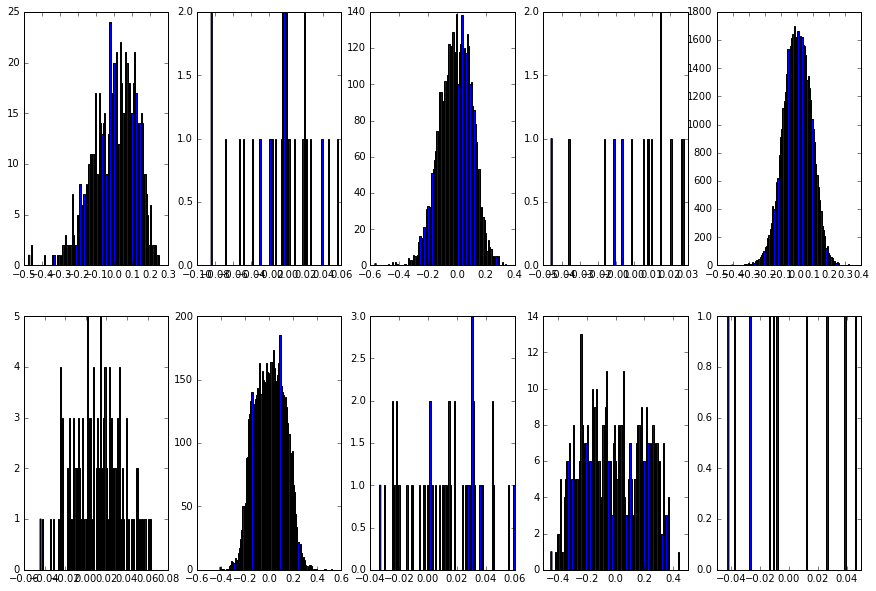

In [44]:
# get weights
W=model.get_weights()
print len(W)

# dispaly histograms
plt.figure(figsize=(15, 10))
r,c=2,5
for k in range(r*c): 
    print 'weights shape:', W[k].shape
    Wk = np.squeeze(W[k])
    print 'weights shape:', Wk.shape
    plt.subplot(r,c,k+1)   
    plt.hist(Wk.flatten(),100)
plt.show()

weights shape: (30, 1, 5, 5)
weights shape: (30, 5, 5)
weights shape: (30,)
weights shape: (30,)
weights shape: (15, 30, 3, 3)
weights shape: (15, 30, 3, 3)
weights shape: (15,)
weights shape: (15,)
weights shape: (375, 128)
weights shape: (375, 128)
weights shape: (128,)
weights shape: (128,)
weights shape: (128, 50)
weights shape: (128, 50)
weights shape: (50,)
weights shape: (50,)
weights shape: (50, 10)
weights shape: (50, 10)
weights shape: (10,)
weights shape: (10,)


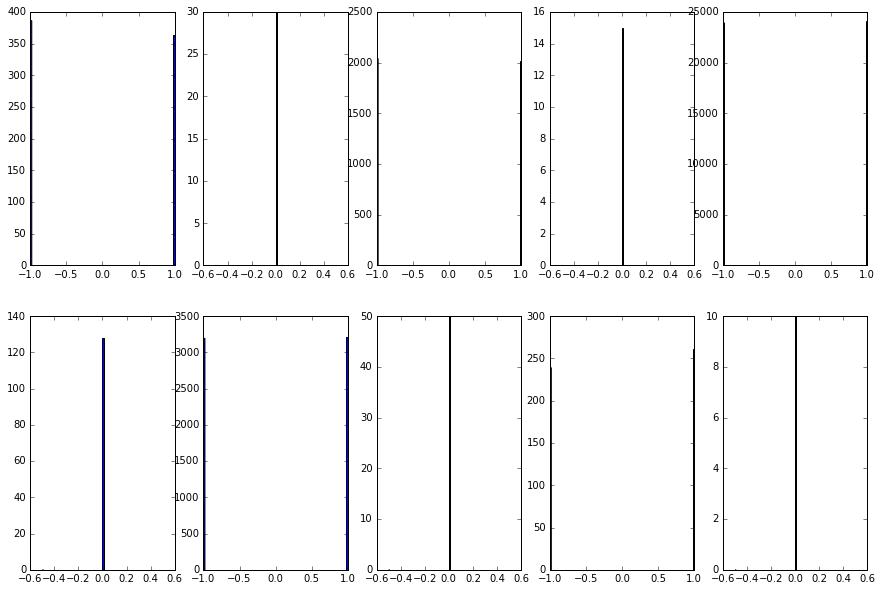

In [8]:
# binarize weights
W=model.get_weights()
LW=len(W)
for k in range(LW):
    W[k]=np.sign(W[k])
#model.set_weights(W)


# dispaly histograms
plt.figure(figsize=(15, 10))
r,c=2,5
for k in range(r*c): 
    print 'weights shape:', W[k].shape
    Wk = np.squeeze(W[k])
    print 'weights shape:', Wk.shape
    plt.subplot(r,c,k+1)   
    plt.hist(Wk.flatten(),100)
plt.show()

In [51]:
print 'wait to train ...'
params={'lr': 1e-2}
model = larger_model(params)

# train on batch
N=X_train.shape[0]
BS=200
nb_epochs=10


for e in range(nb_epochs):
    print 'epoch: %s' %e
    for k in range(0,N,BS):
        #print 'minibatch:%s' %k
        
        # quantize weights
        W=model.get_weights()
        for c1 in range(len(W)):
            #w=W[c1]
            #n=(reduce(lambda x,y: x*y, w.shape)) 
            #alfa=LA.norm(w.flatten(),1)/n
            #alafa=.01
            #W[c1]=alfa*np.sign(W[c1])
            #W[w1]=np.array(W[w1],dtype='float16')
            W[c1]=np.around(W[c1],decimals=3) # Evenly round to the given number of decimals
            #W[w1]=W[w1]
        model.set_weights(W)
        
        Xb=X_train[k:k+BS,:]
        yb=y_train[k:k+BS,:]
        # Fit the model
        model.fit(Xb, yb, nb_epoch=1,verbose=0                                                                                                                             )

    # evaluate
    scores = model.evaluate(X_train, y_train, verbose=0)
    print("Train Error: %.2f%%" % (100-scores[1]*100))

    # evaluate
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Test Error: %.2f%%" % (100-scores[1]*100))



wait to train ...
epoch: 0
Train Error: 3.50%
Test Error: 3.25%
epoch: 1
Train Error: 3.20%
Test Error: 3.02%
epoch: 2
Train Error: 3.08%
Test Error: 3.08%
epoch: 3
Train Error: 3.04%
Test Error: 3.42%
epoch: 4
Train Error: 3.08%
Test Error: 3.13%
epoch: 5
Train Error: 2.52%
Test Error: 2.61%
epoch: 6
Train Error: 2.90%
Test Error: 2.97%
epoch: 7
Train Error: 1.76%
Test Error: 2.05%
epoch: 8
Train Error: 2.12%
Test Error: 2.31%
epoch: 9
Train Error: 2.45%
Test Error: 2.61%


weights shape: (30, 1, 5, 5)
weights shape: (30, 5, 5)
weights shape: (30,)
weights shape: (30,)
weights shape: (15, 30, 3, 3)
weights shape: (15, 30, 3, 3)
weights shape: (15,)
weights shape: (15,)
weights shape: (375, 128)
weights shape: (375, 128)
weights shape: (128,)
weights shape: (128,)
weights shape: (128, 50)
weights shape: (128, 50)
weights shape: (50,)
weights shape: (50,)
weights shape: (50, 10)
weights shape: (50, 10)
weights shape: (10,)
weights shape: (10,)


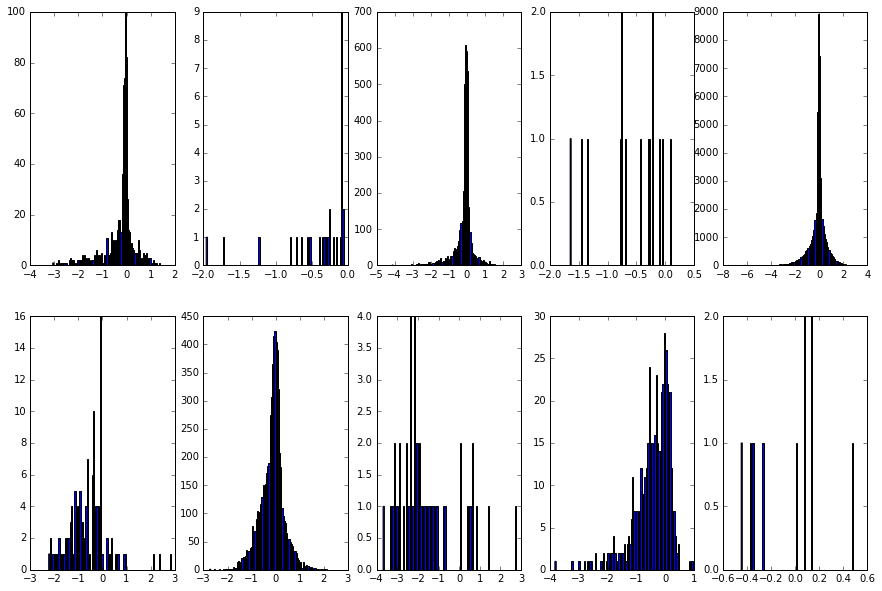

In [52]:
# dispaly histograms
plt.figure(figsize=(15, 10))
r,c=2,5
for k in range(r*c): 
    print 'weights shape:', W[k].shape
    Wk = np.squeeze(W[k])
    print 'weights shape:', Wk.shape
    plt.subplot(r,c,k+1)   
    plt.hist(Wk.flatten(),100)
plt.show()

In [13]:
for w in W:
    print w.shape
    n=(reduce(lambda x,y: x*y, w.shape)) 
    print LA.norm(w.flatten(),1)/n    
    
print W[2].shape    
print alfa


(30, 1, 5, 5)
2.87311002604
(30,)
1.32667020162
(15, 30, 3, 3)
0.018530032311
(15,)
0.23986008962
(375, 128)
0.0179228197734
(128,)
0.162111505866
(128, 50)
0.0712506961823
(50,)
0.214134922028
(50, 10)
0.338069366455
(10,)
0.46519036293
(15, 30, 3, 3)
0.46519036293
